<a href="https://colab.research.google.com/github/pedrocassioG/criar-e-avaliar-modelos/blob/main/Projeto%2Binicial%2B_%2BClassifica%C3%A7%C3%A3o%2B_%2BValida%C3%A7%C3%A3o%2Be%2Bm%C3%A9tricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='dark'>**Classificação: Validação de modelos e métricas de avaliação**</h1>

### Projeto

Uma empresa de empréstimo de automóveis está passando por uma situação complicada, com alta demanda para uma frota reduzida de veículos e alto número de inadimplentes, trazendo um prejuízo grande para a empresa.

Nós fomos contratados para buscar melhorias na identificação de inadimplentes. A análise dos clientes atualmente é feita de forma manual, cliente por cliente, tomando muito tempo e ainda assim a detecção de inadimplentes é muito imprecisa.

Nossa tarefa é utilizar os dados fornecidos pela empresa para **classificar** os clientes em adimplentes e inadimplentes.

## <font color='dark'>Classificando dados</h1>

### Criando um modelo inicial

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('/content/emp_automovel.csv')

In [3]:
dados

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


In [4]:
x = dados.drop('inadimplente', axis=1)
y = dados['inadimplente']

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
modelo = DecisionTreeClassifier()
modelo.fit(x, y)
modelo.score(x, y)

1.0

In [7]:
print(f' Acurácia: {modelo.score(x, y)}')

 Acurácia: 1.0


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x, x_teste, y, y_teste = train_test_split(x, y, test_size= 0.15, stratify = y, random_state = 5)

In [10]:
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify = y, random_state = 5)

In [11]:
modelo = DecisionTreeClassifier()
modelo.fit(x_treino, y_treino)

DecisionTreeClassifier()

In [12]:
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 1.0
Acurácia de validação: 0.8493162616496821


In [13]:
modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=10)

In [14]:
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 0.9205574912891986
Acurácia de validação: 0.9059315390645414


In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
y_previsto = modelo.predict(x_val)

In [17]:
matriz_confusao = confusion_matrix(y_val, y_previsto)
print(matriz_confusao)

[[10359   120]
 [  960    42]]


In [18]:
from sklearn.metrics import ConfusionMatrixDisplay

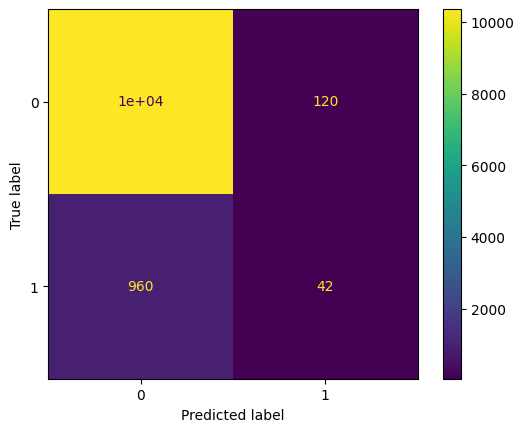

In [19]:
vizualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao)
vizualizacao.plot();

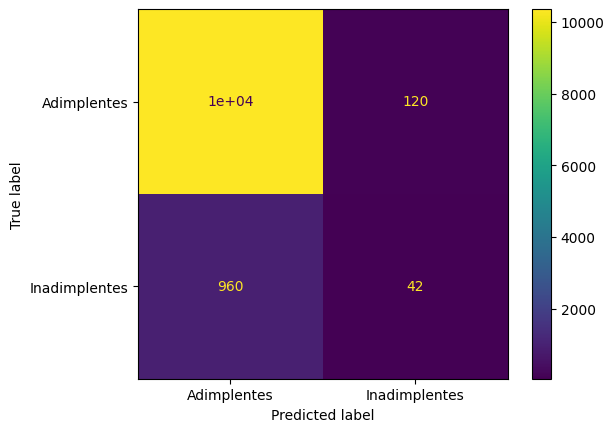

In [20]:
vizualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao,
                                      display_labels=['Adimplentes','Inadimplentes'])
vizualizacao.plot();

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
print(f'Acurácia: {accuracy_score(y_val, y_previsto)}')

Acurácia: 0.9059315390645414


In [23]:
from sklearn.metrics import precision_score, recall_score

In [24]:
print(f'Precisão: {precision_score(y_val, y_previsto)}')
print(f'Recall: {recall_score(y_val, y_previsto)}')


Precisão: 0.25925925925925924
Recall: 0.041916167664670656


In [25]:
from sklearn.metrics import f1_score

In [26]:
print(f'F1-score: {f1_score(y_val, y_previsto)}')

F1-score: 0.07216494845360824


In [27]:
from sklearn.metrics import RocCurveDisplay

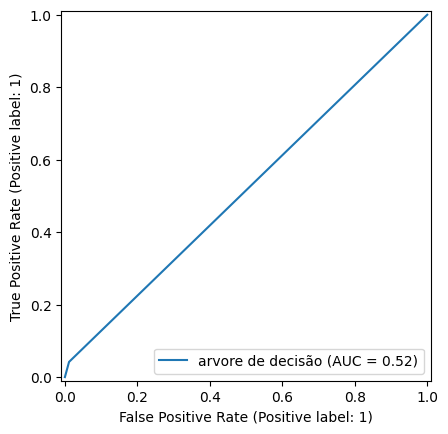

In [28]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name = 'arvore de decisão');

In [29]:
from sklearn.metrics import roc_auc_score

In [30]:
print(f'AUC : {roc_auc_score(y_val, y_previsto)}')

AUC : 0.5152323466436723


In [31]:
from sklearn.metrics import PrecisionRecallDisplay

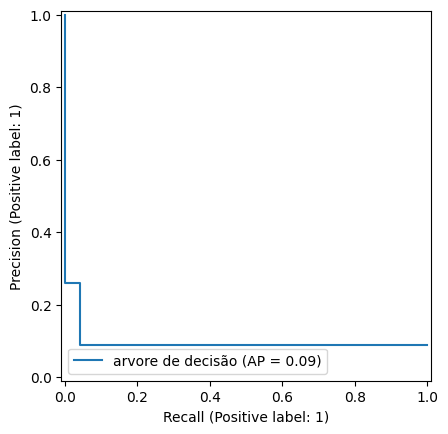

In [32]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name= 'arvore de decisão');

In [33]:
from sklearn.metrics import average_precision_score

In [34]:
print(f'AP : {average_precision_score(y_val, y_previsto)}')


AP : 0.09448356430013705


In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.26      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.59      0.52      0.51     11481
weighted avg       0.86      0.91      0.87     11481



In [37]:
from sklearn.model_selection import cross_validate, KFold

In [38]:
modelo = DecisionTreeClassifier(max_depth = 10)

In [39]:
kf = KFold(n_splits= 5, shuffle= True, random_state= 5)
cv_resultados = cross_validate(modelo, x, y, cv= kf)
cv_resultados

{'fit_time': array([0.25801945, 0.24795675, 0.24216628, 0.25117207, 0.24040318]),
 'score_time': array([0.00387168, 0.0035522 , 0.00365186, 0.00337005, 0.0036695 ]),
 'test_score': array([0.91377246, 0.90744774, 0.90755662, 0.91256533, 0.89949913])}

In [40]:
cv_resultados['test_score']


array([0.91377246, 0.90744774, 0.90755662, 0.91256533, 0.89949913])

In [41]:
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()
print(f'Intervalo de confiança: [{media - (2*desvio_padrao)}, {min(media + (2*desvio_padrao), 1)}]')

Intervalo de confiança: [0.8980969749601017, 0.9182395332082308]


In [42]:
def intervalo_conf(resultados):
    media = resultados['test_score'].mean()
    desvio_padrao = resultados['test_score'].std()
    print(f'Intervalo de confiança: [{media - (2*desvio_padrao)}, {min(media + (2*desvio_padrao), 1)}]')

In [43]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits= 5, shuffle= True, random_state= 5)
cv_resultados = cross_validate(modelo, x, y, cv= kf, scoring= 'recall')
cv_resultados

{'fit_time': array([0.26041603, 0.24424934, 0.24211073, 0.25057173, 0.24934959]),
 'score_time': array([0.00732732, 0.0062232 , 0.00594735, 0.00697541, 0.00590181]),
 'test_score': array([0.02774108, 0.0210396 , 0.0196802 , 0.01436031, 0.02312139])}

In [44]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.012443521451834324, 0.02993351238207672]


In [45]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits= 5, shuffle= True, random_state= 5)
cv_resultados = cross_validate(modelo, x, y, cv= kf, scoring= 'accuracy')
cv_resultados

{'fit_time': array([0.2404089 , 0.23767567, 0.23127842, 0.25058484, 0.24842143]),
 'score_time': array([0.00372863, 0.00391054, 0.00372314, 0.00365424, 0.0037303 ]),
 'test_score': array([0.91333696, 0.90777439, 0.90755662, 0.91310976, 0.89939024])}

In [46]:
intervalo_conf(cv_resultados)


Intervalo de confiança: [0.898086858008405, 0.9183803311482833]


In [47]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits= 5, shuffle= True, random_state= 5)
cv_resultados = cross_validate(modelo, x, y, cv= kf, scoring= 'precision')
cv_resultados

{'fit_time': array([0.27028084, 0.24019861, 0.25217032, 0.24265409, 0.24434876]),
 'score_time': array([0.0065558 , 0.00602245, 0.00592589, 0.00594306, 0.0059638 ]),
 'test_score': array([0.24418605, 0.22727273, 0.2238806 , 0.23636364, 0.2       ])}

In [48]:
intervalo_conf(cv_resultados)


Intervalo de confiança: [0.19641176712925273, 0.256269435735914]


In [49]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits= 5, shuffle= True, random_state= 5)
cv_resultados = cross_validate(modelo, x, y, cv= kf, scoring= 'f1')
cv_resultados

{'fit_time': array([0.2452383 , 0.25058222, 0.23812532, 0.23853064, 0.23671603]),
 'score_time': array([0.00619411, 0.00609589, 0.00576282, 0.00568819, 0.00634623]),
 'test_score': array([0.05023923, 0.03632236, 0.03644647, 0.02926829, 0.04153686])}

In [50]:
intervalo_conf(cv_resultados)


Intervalo de confiança: [0.024881123348317744, 0.05264416517216691]


In [51]:
dados['inadimplente'].value_counts(normalize= True)

,proportion
inadimplente,
0,0.912707
1,0.087293


In [52]:
from sklearn.model_selection import StratifiedKFold

In [53]:
modelo = DecisionTreeClassifier(max_depth= 10)

In [54]:
skf = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 5)
cv_resultados = cross_validate(modelo, x, y, cv= skf, scoring= 'recall')

In [55]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.018801017865465952, 0.03806866809441587]


In [56]:
from imblearn.over_sampling import SMOTE

In [57]:
oversample = SMOTE()
x_balanceado, y_balanceado = oversample.fit_resample(x, y)

In [59]:
y_balanceado.value_counts(normalize= True)

,proportion
inadimplente,
0,0.5
1,0.5


In [65]:
modelo = DecisionTreeClassifier(max_depth= 10)
skf = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 5)
cv_resultados = cross_validate(modelo, x_balanceado, y_balanceado, cv= skf, scoring= 'recall')


In [66]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.7037447588431403, 0.7533566518955999]


In [67]:
from imblearn.pipeline import Pipeline as imbpipeline

In [69]:
modelo = DecisionTreeClassifier(max_depth= 10)
pipeline = imbpipeline([('oversample', SMOTE()),('arvore', modelo)])

In [70]:
skf = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 5)
cv_resultados = cross_validate(pipeline, x, y, cv= skf, scoring= 'recall')

In [71]:
intervalo_conf(cv_resultados)


Intervalo de confiança: [0.210594663873576, 0.2957711319987905]


In [73]:
from imblearn.under_sampling import NearMiss

In [74]:
modelo = DecisionTreeClassifier(max_depth= 10)
pipeline = imbpipeline([('undersample', NearMiss(version= 3)), ('arvore', modelo)])

In [75]:
skf = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 5)
cv_resultados = cross_validate(pipeline, x, y, cv= skf, scoring= 'recall')

In [76]:
intervalo_conf(cv_resultados)


Intervalo de confiança: [0.6199050419278893, 0.7026014259847262]


In [77]:
undersample = NearMiss(version= 3)
x_balanceado, y_balanceado = undersample.fit_resample(x, y)

In [79]:
modelo = DecisionTreeClassifier(max_depth= 10)
modelo.fit(x_balanceado, y_balanceado)
y_previsto = modelo.predict(x_teste)

print(classification_report(y_teste, y_previsto))

              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



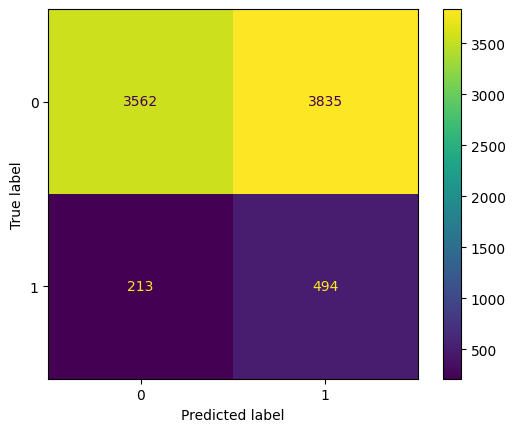

In [80]:
ConfusionMatrixDisplay.from_predictions(y_teste, y_previsto);